In [107]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas_profiling import ProfileReport
#read file
df=pd.read_csv('myfile.csv', thousands=',')
%matplotlib inline
print(df)

            Date    Open    High     Low   Close    Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7380500
1       1/4/2012  331.27  333.87  329.08  666.45   5749400
2       1/5/2012  329.83  330.75  326.89  657.21   6590300
3       1/6/2012  328.34  328.77  323.68  648.24   5405900
4       1/9/2012  322.04  322.29  309.46  620.76  11688800
...          ...     ...     ...     ...     ...       ...
1253  12/23/2016  790.90  792.74  787.28  789.91    623400
1254  12/27/2016  790.68  797.86  787.66  791.55    789100
1255  12/28/2016  793.70  794.23  783.20  785.05   1153800
1256  12/29/2016  783.33  785.93  778.92  782.79    744300
1257  12/30/2016  782.75  782.78  770.41  771.82   1770000

[1258 rows x 6 columns]


In [115]:
#generate features for a stock/index based on historical price and perfomance
#Args:df(dataframe with columns "open","close","High","Low", "Volume", "Adjusted Close")
#Returns:dataframe,data set with new features
    
def generate_features(df):
    df_new=pd.DataFrame()
    df_new['Date']=pd.to_datetime(df['Date'])
    df_new.sort_values(by=['Date'], inplace=True, ascending=True)
    #6 original features
    #shift index by 1 ,inorder totake the value of prev day eg,[1,5,6,7]->[N/A,1,5,6]
    df_new['Open']=pd.to_numeric(df['Open'])
    df_new['Open_1']=pd.to_numeric(df['Open'].shift(1))
    # Shift index by 1, in order to take the value of previous day. For example, [1, 3, 4, 2] -> [N/A, 1, 3, 4]
    df_new['Close_1'] = pd.to_numeric(df['Close'].shift(1))
    df_new['High_1'] = pd.to_numeric(df['High'].shift(1))
    df_new['Low_1'] = pd.to_numeric(df['Low'].shift(1))
    df_new['Volume_1'] = pd.to_numeric(df['Volume'].shift(1))
    #print(df_new)
    # 31 original features
    # average price
    # rolling_mean calculates the moving average given a window. For example, [1, 2, 1, 4, 3, 2, 1, 4]-> [N/A, N/A, N/A, N/A, 2.2, 2.4, 2.2, 2.8]
    df_new['avg_price_5'] = pd.Series(df['Close']).rolling(window=5).mean().shift(1)
    df_new['avg_price_30'] = pd.Series(df['Close']).rolling(window=21).mean().shift(1)
    df_new['avg_price_365'] = pd.Series(df['Close']).rolling(window=252).mean().shift(1)
    df_new['ratio_avg_price_5_30'] =df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_5_365'] =df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_365'] =df_new['avg_price_30'] / df_new['avg_price_365']
    # average volume
    df_new['avg_volume_5'] =pd.Series(df['Volume']).rolling( window=5).mean().shift(1)
    df_new['avg_volume_30'] =pd.Series(df['Volume']).rolling( window=21).mean().shift(1)
    df_new['avg_volume_365'] =pd.Series(df['Volume']).rolling(window=252).mean().shift(1)
    df_new['ratio_avg_volume_5_30'] =df_new['avg_volume_5'] / df_new['avg_volume_30']
    df_new['ratio_avg_volume_5_365'] =df_new['avg_volume_5'] / df_new['avg_volume_365']
    df_new['ratio_avg_volume_30_365'] =df_new['avg_volume_30'] / df_new['avg_volume_365']
    # standard deviation of prices
    df_new['std_price_5'] =pd.Series(df['Close']).rolling(window=5).std().shift(1)
    df_new['std_price_30'] =pd.Series(df['Close']).rolling(window=21).std().shift(1)
    df_new['std_price_365'] =pd.Series(df['Close']).rolling(window=252).std().shift(1)
    df_new['ratio_std_price_5_30'] =df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_365'] =df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_365'] =df_new['std_price_30'] / df_new['std_price_365']
    # standard deviation of volumes
    df_new['std_volume_5'] =pd.Series(df['Volume']).rolling(window=5).std().shift(1)
    df_new['std_volume_30'] =pd.Series(df['Volume']).rolling(window=21).std().shift(1)
    df_new['std_volume_365'] =pd.Series(df['Volume']).rolling(window=252).std().shift(1)
    df_new['ratio_std_volume_5_30'] =df_new['std_volume_5'] / df_new['std_volume_30']
    df_new['ratio_std_volume_5_365'] =df_new['std_volume_5'] / df_new['std_volume_365']
    df_new['ratio_std_volume_30_365'] =df_new['std_volume_30'] / df_new['std_volume_365']
    # return
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1))/ df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5))/ df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] -df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_365'] = ((df['Close'] -df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)
    df_new['moving_avg_5'] =pd.Series(df_new['return_1']).rolling(window=5).mean()
    df_new['moving_avg_30'] =pd.Series(df_new['return_1']).rolling(window=21).mean()
    df_new['moving_avg_365'] =pd.Series(df_new['return_1']).rolling(window=252).mean()
    # the target
    df_new['Close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    # This will drop rows with any N/A value, which is by-product of moving average/std.
    return df_new
    

In [123]:
data=generate_features(df)
print(data)
train=data[:700]
valid=data[700:]
train_x=train.drop(['Close','Date'],axis=1)
train_y=train['Close']
valid_Date=valid.Date
valid_x=valid.drop(['Close','Date'],axis=1)
valid_y=valid['Close']
model=LinearRegression()

model.fit(train_x,train_y)

           Date    Open  Open_1  Close_1  High_1   Low_1   Volume_1  \
253  2013-01-07  366.35  363.31   735.95  369.35  362.48  5547600.0   
254  2013-01-08  366.40  366.35   732.74  368.31  363.93  3323800.0   
255  2013-01-09  364.77  366.40   731.29  366.78  360.86  3364700.0   
256  2013-01-10  370.03  364.77   736.10  367.80  362.94  4064500.0   
257  2013-01-11  369.61  370.03   739.45  371.11  365.38  3685000.0   
...         ...     ...     ...      ...     ...     ...        ...   
1253 2016-12-23  790.90  792.36   791.26  793.32  788.58   972200.0   
1254 2016-12-27  790.68  790.90   789.91  792.74  787.28   623400.0   
1255 2016-12-28  793.70  790.68   791.55  797.86  787.66   789100.0   
1256 2016-12-29  783.33  793.70   785.05  794.23  783.20  1153800.0   
1257 2016-12-30  782.75  783.33   782.79  785.93  778.92   744300.0   

      avg_price_5  avg_price_30  avg_price_365  ...  ratio_std_volume_5_365  \
253       716.488    705.899524     641.982381  ...                0

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
#make preictions and find the rmse
preds=model.predict(valid_x)
rms=np.sqrt(np.mean(np.power((np.array(valid_y)-np.array(preds)),2)))
print(model.score(valid_x,valid_y))
print(rms)

0.8609641269977225
12.679737107256297


305
           Date  predictions   Close
953  2015-10-16   666.853044  662.20
954  2015-10-19   666.709919  666.10
955  2015-10-20   669.226028  650.28
956  2015-10-21   651.085767  642.61
957  2015-10-22   642.715564  651.79
...         ...          ...     ...
1253 2016-12-23   800.636816  789.91
1254 2016-12-27   800.110805  791.55
1255 2016-12-28   797.038180  785.05
1256 2016-12-29   787.241977  782.79
1257 2016-12-30   791.921142  771.82

[305 rows x 3 columns]


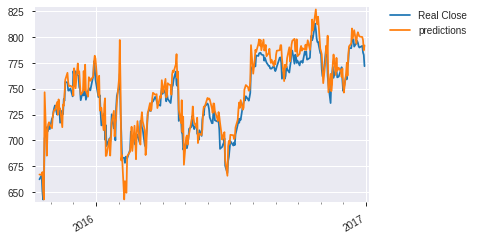

In [178]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
#plot
print(len(preds))

#valid.insert(39,'predictions',preds)
#valid.insert(0,'date',valid_date)
#print(valid[['predictions','close']])
print(valid[['Date','predictions','Close']])
y1=valid.Close
y2=valid.predictions
x=valid.Date
fig,ax=plt.subplots()
ax.plot(x,y1,label="Real Close")
ax.plot(x,y2,label="predictions")
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.margins(0.015)
fig.autofmt_xdate()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
#ProfileReport(valid[['predictions','close']])